In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

## Median Filtering and OTSU thresholding

In [5]:
def rotate_img(img):
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray = img
    gray = cv2.bitwise_not(gray)
    
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    print(angle)
    
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    print(angle)
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
    return rotated

In [6]:
def median_subtract(noisy_img):
    noisy_img = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2GRAY)
    background=cv2.medianBlur(noisy_img, 25)  # Kernel size is 25
    result=cv2.subtract(background, noisy_img)
    result=cv2.bitwise_not(result) # reverse foreground and bg color ( make fg as black and bg as white)
    thresh = cv2.threshold(result, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1] 
    # 2nd parameter min threshold value, 3rd parameter - max threshold value, 4th param - binary as well as otsu
    return (thresh, background)

-23.010513305664062
23.010513305664062


True

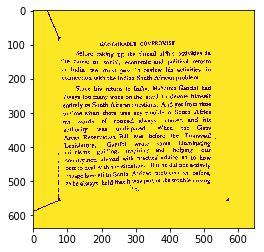

In [7]:
dirty_img = cv2.imread('./image/aug/aug_12-shakkthi_7.jpeg')
rotated =  rotate_img(dirty_img)
plt.imshow(rotated)
plt.plot()
result, background=median_subtract(rotated)
cv2.imwrite('./medianfilter-clean.jpeg',result)

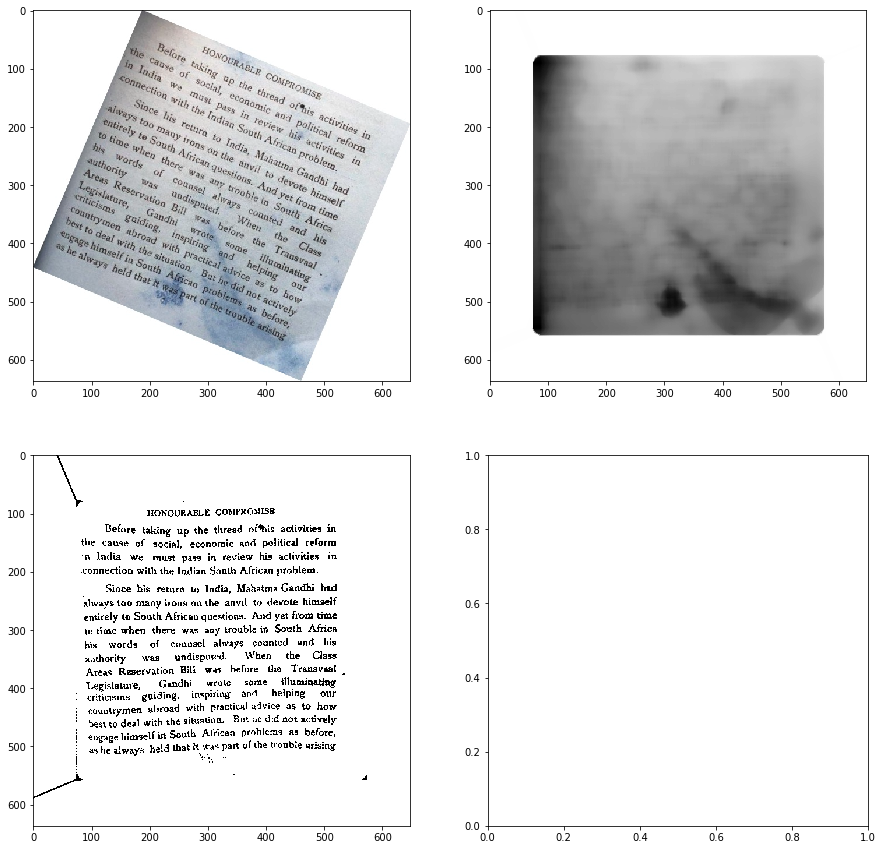

In [8]:
plt.rcParams["axes.grid"] = False
fig, axarr= plt.subplots(2,2, figsize=(15,15))
axarr[0,0].imshow(dirty_img, cmap='gray')
axarr[0,1].imshow(background, cmap='gray')
axarr[1,0].imshow(result, cmap='gray')

## Adaptive Thresholding

In [17]:
def adaptive_thresholding(noisy_img):
    noisy_img = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2GRAY)
    adaptive_th=cv2.adaptiveThreshold(noisy_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,10)
    # 2nd parameter - maximum value of threshold 255 (white) 
    # 3rd parameter - Adaptive method - Either Gaussian or Mean ( Gaussian is preferable as it takes weieghted sum of neighbouring pixels)
    # 4th paramter - Threshold ttype - Binary (black and white)
    # 5th parameter - kernel size ( here 15*15 )
    # 6th parameter - constant value that needs to be subtracted (trial and errror method try for different values)
    return (adaptive_th)

In [18]:
adaptive_th = adaptive_thresholding(dirty_img)
cv2.imwrite('./adaptive-clean.jpeg',adaptive_th)

True

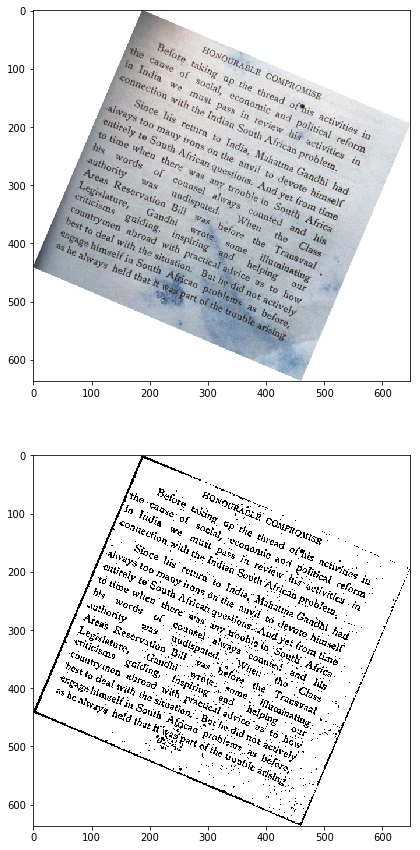

In [19]:
plt.rcParams["axes.grid"] = False
fig, axarr= plt.subplots(2,1, figsize=(15,15))
# axarr[0,0].imshow(denoised_img, cmap='gray')
axarr[0].imshow(dirty_img, cmap='gray')
axarr[1].imshow(adaptive_th, cmap='gray')

## Edge detection dilation erosion

In [ ]:
def edge_detection_dilation_erosion(noisy_img):
    edges=cv2.Canny(noisy_img, 100, 100,100)
    edges=cv2.bitwise_not(edges)
    kernel = np.ones((3,3),np.uint8)
    dilation = cv2.dilate(cv2.bitwise_not(edges),kernel,iterations = 1)
    dilation=cv2.bitwise_not(dilation)
    kernel1 = np.ones((5,5),np.uint8)
    erosion=cv2.erode(cv2.bitwise_not(dilation), kernel1,iterations=1)
    erosion=cv2.bitwise_not(erosion)
    thresh = cv2.threshold(erosion, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    return (edges, dilation, erosion)

In [ ]:
edges, dilation, erosion = edge_detection_dilation_erosion(dirty_img)

In [ ]:
plt.rcParams["axes.grid"] = False
fig, axarr= plt.subplots(2,2, figsize=(15,15))
axarr[0,0].imshow(edges, cmap='gray')
axarr[0,1].imshow(dilation, cmap='gray')
axarr[1,0].imshow(erosion, cmap='gray')
# axarr[1,1].imshow(result, cmap='gray')